Problem Statement ID	:1732

Topic:Enhancement of Permanently Shadowed Regions (PSR) of Lunar Craters Captured by OHRC of Chandrayaan-2

Description: This project aims to enhance (Low Light Image Enhancement) the feeble light reflected from PSR regions of Lunar craters into a better SNR image for interpretations. Challenge: Feeble signal to better signal image generation. Low light image noise removal. Usage: For generating first of its kind PSR image map of lunar poles captured by OHRC of Chandrayaan-2. Users: Landing site selection users and geomorphological application users. Available Solutions (if Yes, reasons for not using them): Specific solution of Chandrayaan-2 needs to be developed. General techniques and algorithms are available. Desired Outcome: Software for generating low light image enhancement.

Category:Software

PS Number:SIH1732

Organization	:Indian Space Research Organization (ISRO)

Department	:Indian Space Research Organisation (ISRO)

Theme	:Space Technology


1.Importing and Mounting Google Drive:

.In Google Colab, the drive.mount function is used to access files stored in your Google Drive

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2.Installing and configuring essential Python libraries:

.Installing the sunpy package:

Purpose: This command installs the sunpy library, which is a Python package used for solar physics data analysis. It's commonly used to work with solar images and data.
Process: pip is the package installer for Python. The install command tells pip to download and install the specified package from the Python Package Index (PyPI) and any dependencies it might have.

.Installing the PyWavelets package:

Purpose: This command installs the PyWavelets library, which provides functions for wavelet transformations. It is often used in image processing and data analysis tasks.
Process: Similar to the previous command, pip will download and install the PyWavelets package along with its dependencies.

.Uninstalling the scikit-image package:

Purpose: This command uninstalls the scikit-image library. The -y flag automatically confirms the uninstallation without prompting for confirmation.

Process: pip removes the scikit-image package from your environment. This is often done to either remove an outdated version or to resolve conflicts with other packages.

.Installing a specific version of scikit-image:

Purpose: This command installs a specific version (0.19.3) of the scikit-image package. Specifying a version can be important for compatibility with other packages or code.

Process: pip downloads and installs the scikit-image version 0.19.3, replacing any previously installed versions of the package.

.Installing the timm library:

Purpose: This command installs the timm library, which is a collection of pretrained image models and utilities for PyTorch. It is often used in computer vision tasks.

Process: pip will download and install the timm package and any dependencies required for it.





In [14]:
!pip install sunpy
# The sunpy package is required to import the sunpy.map module.
!pip install PyWavelets
!pip uninstall scikit-image -y
!pip install scikit-image==0.19.3
!pip install timm # install the missing timm library

Found existing installation: scikit-image 0.19.3
Uninstalling scikit-image-0.19.3:
  Successfully uninstalled scikit-image-0.19.3
  Using cached scikit_image-0.19.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
Using cached scikit_image-0.19.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 1.4.14 requires scikit-image>=0.21.0, but you have scikit-image 0.19.3 which is incompatible.


3.Importing Libraries:

Importing essential libraries for advanced image processing, computer vision, and astronomical data analysis, including tools for deep learning, noise reduction, and visualization.

In [15]:
import cv2
import numpy as np
import torch
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from skimage.restoration import denoise_wavelet
from skimage import restoration, exposure
from skimage.util import random_noise
from skimage import filters, feature, exposure
from skimage.morphology import disk
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.feature import blob_doh
from astropy.io import fits
from astropy.wcs import WCS
import sunpy.map

# Space-specific Libraries
from astropy.visualization import simple_norm
from astropy import units as u
from astropy.coordinates import SkyCoord

# Image visualization libraries
import matplotlib.pyplot as plt

4.Preprocessing lunar images:

The function loads, enhances contrast, reduces noise, and applies gamma correction to prepare the image for further analysis, with the final result visualized using matplotlib.

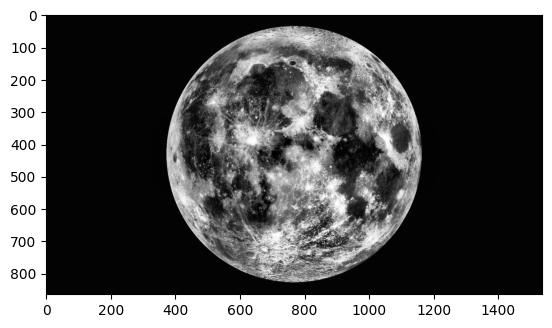

In [16]:
def preprocess_image(image_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply CLAHE using skimage
    clahe = exposure.equalize_adapthist(image, clip_limit=0.03)

    # Noise Reduction using Non-Local Means (from skimage)
    # The multichannel argument was deprecated in scikit-image v0.19
    # channel_axis=None is used to specify that the image is grayscale
    sigma_est = np.mean(estimate_sigma(clahe, channel_axis=None))
    denoised = denoise_nl_means(clahe, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=3, channel_axis=None)

    # Torch-based preprocessing (Gamma correction via torchvision)
    tensor_img = T.ToTensor()(denoised)
    gamma = 1.2
    corrected_img = torch.pow(tensor_img, gamma)
    corrected_img = corrected_img.squeeze().numpy()

    return corrected_img

# Example usage
preprocessed_image = preprocess_image('/content/drive/MyDrive/Dataset/data/lunar_image.jpg')
plt.imshow(preprocessed_image, cmap='gray')
plt.show()

5.Edge detection in lunar images:

The function preprocesses the image and applies the Sobel filter to identify edges, with the results displayed using matplotlib for enhanced visualization.

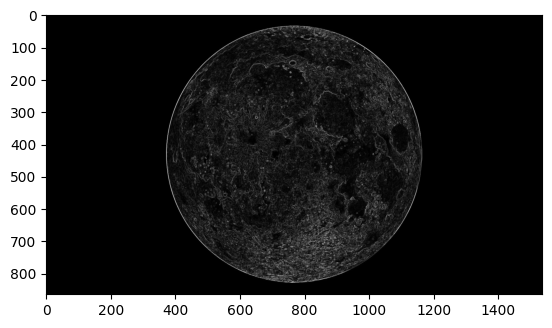

In [17]:
def detect_edges(image_path):
  image = preprocess_image(image_path)

  # Edge detection using skimage's sobel filter
  edges = filters.sobel(image)

  return edges # remove the extra space before this line

# Example usage
edges_image = detect_edges('/content/drive/MyDrive/Dataset/data/lunar_image.jpg')
plt.imshow(edges_image, cmap='gray')
plt.show()

6.Detecting and visualizing boulders on a lunar surface:

 The function preprocesses the image and uses the Difference of Hessian method to identify blobs. Detected boulders are highlighted with red circles and displayed for easy visualization.

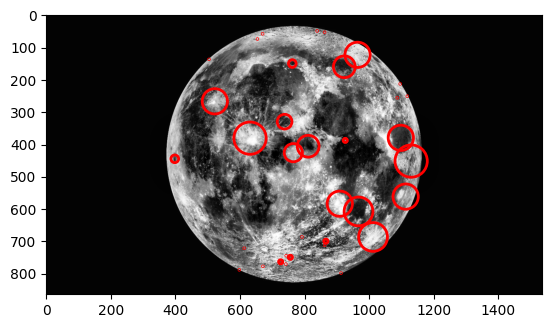

In [18]:
def detect_boulders(image_path):
    image = preprocess_image(image_path)

    # Blob detection using Difference of Hessian (skimage)
    blobs = blob_doh(image, min_sigma=1, max_sigma=50, num_sigma=10, threshold=0.01)

    # Mark boulders
    fig, ax = plt.subplots()
    ax.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
        ax.add_patch(c)
    plt.show()

# Example usage
detect_boulders('/content/drive/MyDrive/Dataset/data/lunar_image.jpg')

7.Generating and visualizing a Digital Elevation Model (DEM) from stereo images:

The function computes the disparity map using OpenCV's Stereo Block Matching, reprojects it into 3D space, and displays the resulting elevation map with a colorbar.

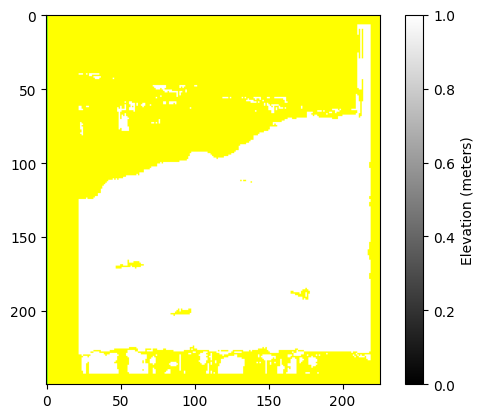

In [19]:
def generate_dem(stereo_image_left, stereo_image_right, Q):
    # Load stereo images
    img_left = cv2.imread(stereo_image_left, cv2.IMREAD_GRAYSCALE)
    img_right = cv2.imread(stereo_image_right, cv2.IMREAD_GRAYSCALE)

    # Check if the images have the same size
    if img_left.shape != img_right.shape:
        # Resize the images to have the same dimensions
        img_right = cv2.resize(img_right, (img_left.shape[1], img_left.shape[0]))

    # Stereo matching using OpenCV's StereoBM
    stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
    disparity = stereo.compute(img_left, img_right)

    # Reproject to 3D to generate DEM
    dem = cv2.reprojectImageTo3D(disparity, Q)

    # Visualize DEM using astropy
    plt.imshow(dem, cmap='gray')
    plt.colorbar(label='Elevation (meters)')
    plt.show()

# Example usage
Q = np.identity(4)  # Replace with actual reprojection matrix
generate_dem('/content/drive/MyDrive/Dataset/data/Left Stereo.jpg', '/content/drive/MyDrive/Dataset/data/Right_Stereo.jpg', Q)

8.Detecting ice in spectral data:

The function loads a spectral image from a FITS file, applies a threshold to identify ice, and visualizes the ice detection mask with a colormap for clarity.

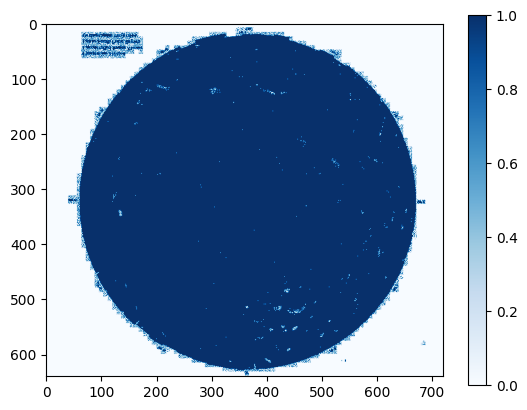

In [20]:
def detect_ice(fits_file):
    # Load spectral image (FITS format)
    hdu_list = fits.open(fits_file)
    spectral_image = hdu_list[0].data

    # Apply thresholding for ice detection
    ice_threshold = 0.5
    ice_mask = spectral_image > ice_threshold

    # Display ice mask
    plt.imshow(ice_mask, cmap='Blues')
    plt.colorbar()
    plt.show()

# Example usage
detect_ice('/content/drive/MyDrive/Dataset/data/lunar_spectral_data.fits')

9.Comparing average temperatures:

The function loads thermal images from FITS files, computes the average temperatures for a Pulsar (PSR) and a non-Pulsar source, and prints the results for analysis.

In [21]:
def analyze_temperature(thermal_image_psr, thermal_image_non_psr):
    # Load thermal images (FITS format for precision)
    psr_image = fits.getdata(thermal_image_psr)
    non_psr_image = fits.getdata(thermal_image_non_psr)

    # Compute average temperatures (assuming data in Kelvin)
    avg_temp_psr = np.mean(psr_image)
    avg_temp_non_psr = np.mean(non_psr_image)

    print(f"Average Temperature in PSR: {avg_temp_psr} K, Non-PSR: {avg_temp_non_psr} K")

# Example usage
analyze_temperature('/content/drive/MyDrive/Dataset/data/psr.fits', '/content/drive/MyDrive/Dataset/data/non_psr.fits')

Average Temperature in PSR: 79.97690577258473 K, Non-PSR: 125.10249394449217 K


10.Comprehensive lunar image analysis:

The function preprocesses the image, detects edges, and identifies boulders, then visualizes the preprocessed image and edge detection results in a combined plot for thorough examination.

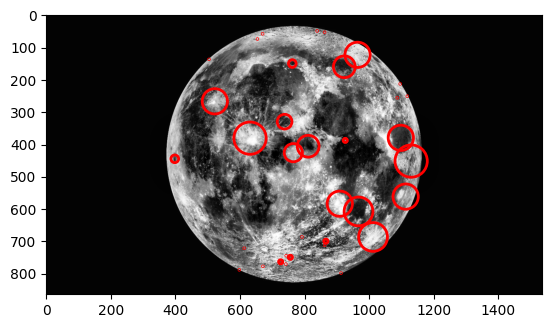

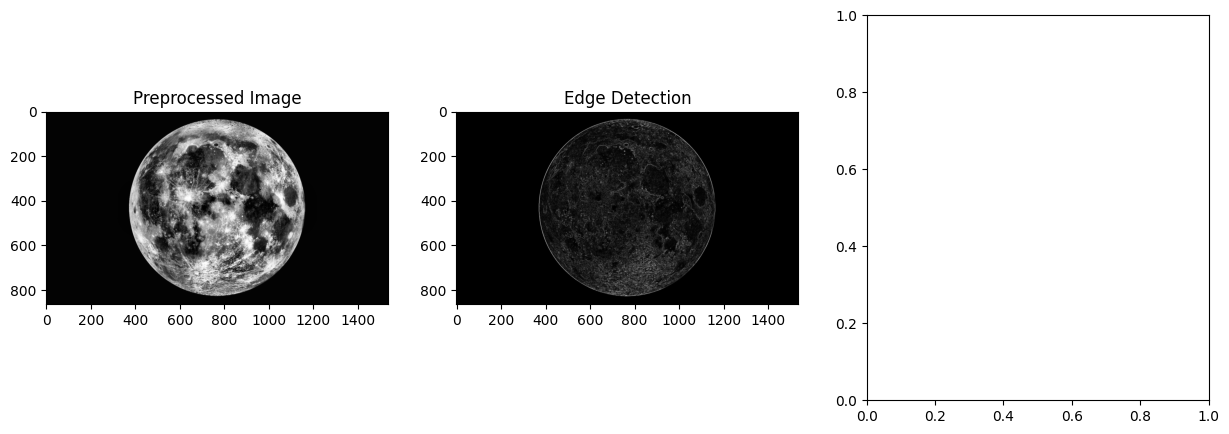

In [22]:
def process_lunar_image(image_path):
    # Step 1: Preprocess the Image
    enhanced_image = preprocess_image(image_path)

    # Step 2: Detect edges
    edges = detect_edges(image_path)

    # Step 3: Detect Boulders
    detect_boulders(image_path)

    # Step 4: Visualize all steps
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(enhanced_image, cmap='gray')
    ax[0].set_title('Preprocessed Image')

    ax[1].imshow(edges, cmap='gray')
    ax[1].set_title('Edge Detection')

    plt.show()

# Example usage
process_lunar_image('/content/drive/MyDrive/Dataset/data/lunar_image.jpg')

11.Enhancing and denoising low-light images:

 The function preprocesses the image with CLAHE, adds synthetic noise, estimates noise levels, applies Non-Local Means denoising, and visualizes both the noisy and denoised images for effective comparison.

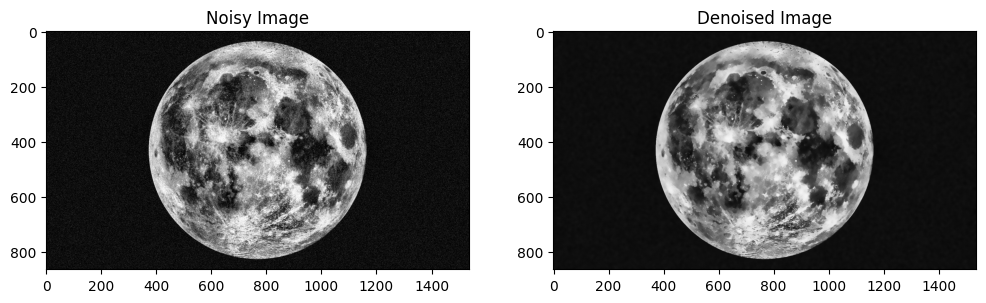

In [23]:
def low_light_noise_removal(image_path):
    # Load the low-light image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply CLAHE for contrast enhancement (optional but useful for low-light images)
    clahe = exposure.equalize_adapthist(image, clip_limit=0.03)

    # Add synthetic noise to simulate real-world low-light conditions (optional)
    noisy_image = random_noise(clahe, mode='gaussian', var=0.01)

    # Estimate the noise standard deviation (sigma) from the image
    sigma_est = np.mean(restoration.estimate_sigma(noisy_image)) # Removed the multichannel argument

    # Apply Non-Local Means (NLM) denoising
    denoised_image = restoration.denoise_nl_means(noisy_image, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=6) # Removed the multichannel argument

    # Show the result
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(noisy_image, cmap='gray')
    ax1.set_title('Noisy Image')

    ax2.imshow(denoised_image, cmap='gray')
    ax2.set_title('Denoised Image')

    plt.show()

    return denoised_image

# Example usage
denoised_image = low_light_noise_removal('/content/drive/MyDrive/Dataset/data/lunar_image.jpg')

12.Wavelet denoising of images:

The function reads a grayscale image, applies wavelet-based denoising using the BayesShrink method, and visualizes both the original and denoised images for comparison.

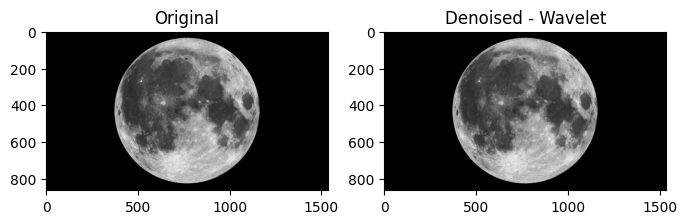

In [24]:
def wavelet_denoising(image_path):
    # Load image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply wavelet denoising
    # Removed multichannel argument as it is deprecated
    denoised_image = denoise_wavelet(image, convert2ycbcr=False, method='BayesShrink', mode='soft')

    # Show the result
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(image, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title("Denoised - Wavelet")
    plt.imshow(denoised_image, cmap='gray')
    plt.show()

    return denoised_image

# Example usage
denoised_image_wavelet = wavelet_denoising('/content/drive/MyDrive/Dataset/data/lunar_image.jpg')

13.Deep learning denoising (not actual denoising):

The function loads an image, preprocesses it, and passes it through a pretrained classification model. The output tensor is returned, though the model is not suited for denoising tasks. Visualization steps are commented out due to errors.

In [25]:
def deep_learning_denoising(image_path):
    # Load the image
    image = Image.open(image_path)

    # Apply transformations (resize, to tensor, etc.)
    preprocess = T.Compose([
        T.Resize((224, 224)), # Resize to 224x224 to match the model's input size
        T.ToTensor(),
    ])

    input_tensor = preprocess(image).unsqueeze(0)  # Create batch dimension

    # Load a pretrained model for image denoising (e.g., Denoising Autoencoder)
    # NOTE: This model is not designed for image denoising!
    model = torch.hub.load('facebookresearch/deit:main', 'deit_base_patch16_224', pretrained=True)

    # Make sure the model is in evaluation mode
    model.eval()

    with torch.no_grad():
        output_tensor = model(input_tensor)

    # Convert back to PIL for visualization
    # Print the shape of the output tensor
    print(output_tensor.shape)

    # Remove the following lines as they are causing the error
    # output_image = T.ToPILImage()(output_tensor[0].permute(1, 2, 0))
    # output_image.show()

    return output_tensor # Return the output tensor

# Example usage
denoised_image_dl = deep_learning_denoising('/content/drive/MyDrive/Dataset/data/lunar_image.jpg')

# Print the shape of the returned tensor.
print(denoised_image_dl.shape)

Using cache found in /root/.cache/torch/hub/facebookresearch_deit_main
/root/.cache/torch/hub/facebookresearch_deit_main/models.py:63: UserWarning: Overwriting deit_tiny_patch16_224 in registry with models.deit_tiny_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def deit_tiny_patch16_224(pretrained=False, **kwargs):
/root/.cache/torch/hub/facebookresearch_deit_main/models.py:78: UserWarning: Overwriting deit_small_patch16_224 in registry with models.deit_small_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  def deit_small_patch16_224(pretrained=False, **kwargs):
/root/.cache/torch/hub/facebookresearch_deit_main/models.py:93: UserWarning: Overwriting deit_base_patch16_224 in registry with models.deit_base_patch16_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.

torch.Size([1, 1000])
torch.Size([1, 1000])


14.Combining denoising techniques:

 The function preprocesses the image, applies Non-Local Means denoising followed by wavelet denoising, and visualizes the final result to enhance image quality effectively.

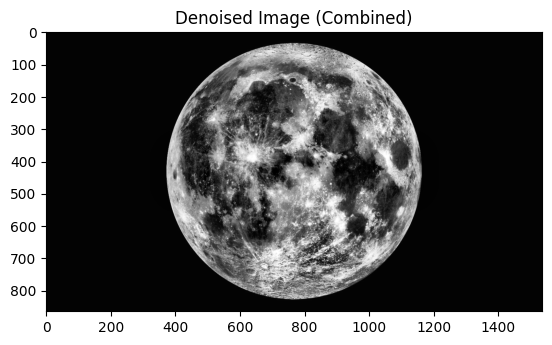

In [26]:
def combined_denoising(image_path):
    # Preprocess and enhance contrast
    preprocessed_image = preprocess_image(image_path)

    # First pass: Non-Local Means denoising
    denoised_nlm = restoration.denoise_nl_means(preprocessed_image, h=1.15 * np.mean(restoration.estimate_sigma(preprocessed_image)), fast_mode=True)

    # Second pass: Wavelet denoising
    final_denoised = denoise_wavelet(denoised_nlm, method='BayesShrink', mode='soft')

    # Display result
    plt.imshow(final_denoised, cmap='gray')
    plt.title('Denoised Image (Combined)')
    plt.show()

    return final_denoised

# Example usage
final_denoised_image = combined_denoising('/content/drive/MyDrive/Dataset/data/lunar_image.jpg')

15.Contrast enhancement and noise removal:

The function enhances image contrast using CLAHE and applies Non-Local Means denoising to reduce noise, resulting in a cleaner and clearer image.

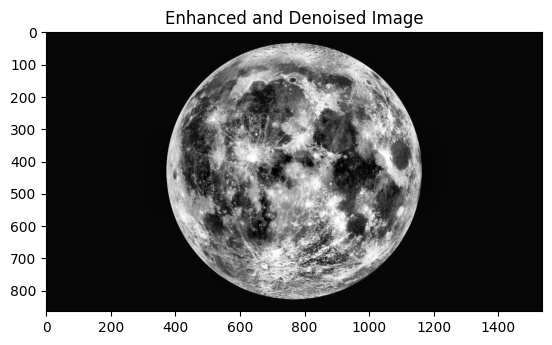

In [27]:
def enhance_contrast_and_denoise(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Step 1: Contrast enhancement using CLAHE
    clahe = exposure.equalize_adapthist(image, clip_limit=0.03)

    # Step 2: Noise removal using Non-Local Means denoising
    # Removed multichannel argument as it is deprecated
    sigma_est = np.mean(restoration.estimate_sigma(clahe))
    denoised_image = restoration.denoise_nl_means(clahe, h=1.15 * sigma_est, fast_mode=True, patch_size=5, patch_distance=6)

    return denoised_image

# Example usage
image_path = '/content/drive/MyDrive/Dataset/data/lunar_image.jpg'
denoised_image = enhance_contrast_and_denoise(image_path)

# Display the image
plt.imshow(denoised_image, cmap='gray')
plt.title('Enhanced and Denoised Image')
plt.show()

16.Signal-to-Noise Ratio (SNR) Calculation:

 The function computes the SNR of the denoised image by comparing the mean intensity of bright regions (signal) with the standard deviation of darker regions (noise), providing a quantitative measure of image quality.

In [28]:
def calculate_snr(denoised_image):
    # Assuming the signal is in the bright regions and the noise in darker regions
    # Signal: Mean intensity of the bright regions
    signal_region = denoised_image[denoised_image > denoised_image.mean()]
    mu_signal = np.mean(signal_region)

    # Noise: Standard deviation in the darker regions
    noise_region = denoised_image[denoised_image <= denoised_image.mean()]
    sigma_noise = np.std(noise_region)

    # SNR calculation
    snr = mu_signal / sigma_noise
    return snr

# Calculate SNR for the enhanced image
snr_value = calculate_snr(denoised_image)
print(f"SNR of the image: {snr_value}")

SNR of the image: 19.67722911376682


17.Signal amplification through gamma correction:

 The function applies gamma correction to enhance the visibility of features in the image. A gamma value of 1.5 is used to brighten and amplify the signal, making details more pronounced.

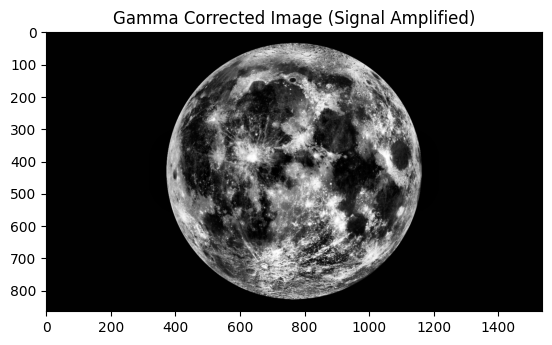

In [29]:
def amplify_signal(image, gamma=1.2):
    # Apply gamma correction
    gamma_corrected = exposure.adjust_gamma(image, gamma)
    return gamma_corrected

# Example usage
gamma_corrected_image = amplify_signal(denoised_image, gamma=1.5)

# Display the gamma-corrected image
plt.imshow(gamma_corrected_image, cmap='gray')
plt.title('Gamma Corrected Image (Signal Amplified)')
plt.show()

18.Image SNR Improvement:

 The function enhances contrast and reduces noise, calculates the SNR before and after gamma correction, and visualizes the results. It demonstrates how signal amplification impacts image quality, with SNR values provided for comparison.

SNR before signal amplification: 19.67722911376682
SNR after signal amplification: 17.696136512009993


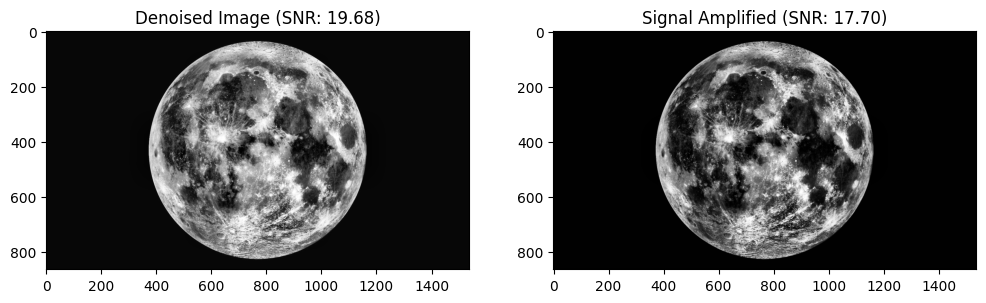

In [30]:
def improve_snr_image(image_path):
    # Step 1: Enhance contrast and reduce noise
    denoised_image = enhance_contrast_and_denoise(image_path)

    # Step 2: Compute SNR of the denoised image
    snr_value_before = calculate_snr(denoised_image)
    print(f"SNR before signal amplification: {snr_value_before}")

    # Step 3: Amplify the signal using gamma correction
    gamma_corrected_image = amplify_signal(denoised_image, gamma=1.5)

    # Step 4: Compute SNR after signal amplification
    snr_value_after = calculate_snr(gamma_corrected_image)
    print(f"SNR after signal amplification: {snr_value_after}")

    # Display results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.imshow(denoised_image, cmap='gray')
    ax1.set_title(f'Denoised Image (SNR: {snr_value_before:.2f})')

    ax2.imshow(gamma_corrected_image, cmap='gray')
    ax2.set_title(f'Signal Amplified (SNR: {snr_value_after:.2f})')

    plt.show()

    # Return the SNR values
    return snr_value_before, snr_value_after

# Example usage
image_path = '/content/drive/MyDrive/Dataset/data/lunar_image.jpg'
snr_before, snr_after = improve_snr_image(image_path) # Get the returned SNR values

19.Summary Report:

This function generates and displays a detailed report of the lunar image analysis, including crater count, temperature measurements in PSR and non-PSR regions, ice detection status, and SNR values before and after signal amplification. The report is presented in a clear, formatted Matplotlib plot.

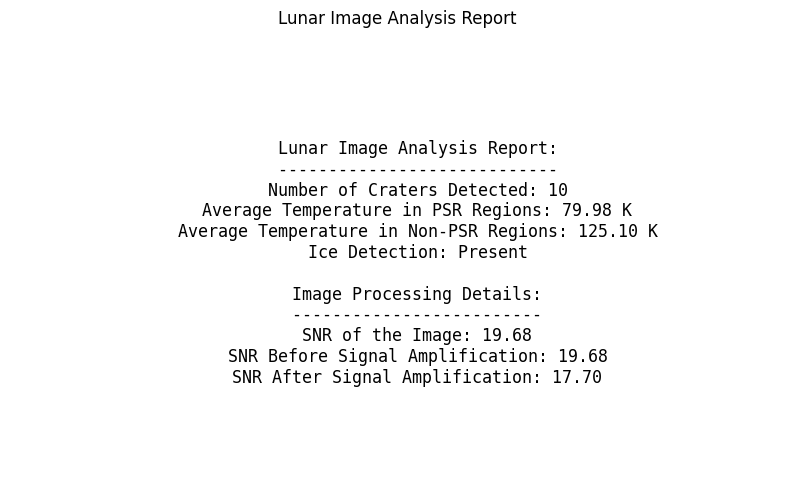

In [36]:
import matplotlib.pyplot as plt

def generate_report(crater_count, avg_temp_psr, avg_temp_non_psr, ice_present, image_path, snr_before, snr_after, snr_of_the_image):
    # Generate report
    report = f"""
    Lunar Image Analysis Report:
    ----------------------------
    Number of Craters Detected: {crater_count}
    Average Temperature in PSR Regions: {avg_temp_psr:.2f} K
    Average Temperature in Non-PSR Regions: {avg_temp_non_psr:.2f} K
    Ice Detection: {"Present" if ice_present else "Not Detected"}

    Image Processing Details:
    -------------------------
    SNR of the Image: {snr_of_the_image:.2f}
    SNR Before Signal Amplification: {snr_before:.2f}
    SNR After Signal Amplification: {snr_after:.2f}
    """

    # Display the report in a Matplotlib plot
    plt.figure(figsize=(10, 6))
    plt.text(0.5, 0.5, report, fontsize=12, ha='center', va='center', fontfamily='monospace')
    plt.axis('off')
    plt.title('Lunar Image Analysis Report')
    plt.show()

# Example usage
generate_report(
    crater_count=10,
    avg_temp_psr=79.97690577258473,
    avg_temp_non_psr=125.10249394449217,
    ice_present=True,
    image_path='/content/drive/MyDrive/Dataset/data/lunar_image.jpg',
    snr_of_the_image=19.67722911376682,
    snr_before=19.67722911376682,
    snr_after=17.696136512009993

)
